In [3]:
import numpy as np
import matplotlib.pyplot as plt

**[Moonlight Sonata in the SM64 Soundfont](https://www.youtube.com/watch?v=28yTOBtzJ_w)**

**[Just the Two of Us but it's Super Mario 64](https://www.youtube.com/watch?v=Rd6PcMfDvJw)**

In [9]:
def cooler_triangles(A, t, coolness):
    seg = (t+2)%6

    if (seg >= 0) and (seg <= 2):
        return A * (2 - seg + (A%((1-t)%6/coolness))) / 2

    elif (seg >= 3) and (seg <= 6):
        return A * (seg - 3 + (A%(t%6/coolness))) / 2

    else:
        return 0

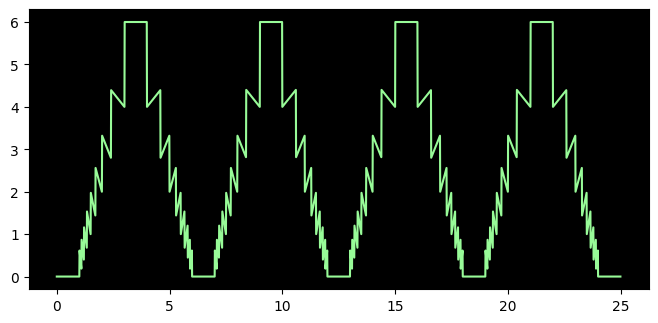

2500 2500 2500


In [10]:
time = np.arange(0, 25, 0.01)
values = [cooler_triangles(4, t, 3) for t in time]

freq = np.fft.fftfreq(len(values), 0.01)
values_fft = np.fft.fft(values)

# Параметры pyplot задаются непосредственно классу pyplot,
# поэтому достаточно объявить их всего один раз здесь:
plt.rcParams['axes.facecolor'] = 'black'
# plt.rcParams['figure.facecolor'] = 'black'
plt.rcParams['figure.figsize'] = (8, 8)

plt.subplot(2, 1, 1)
plt.plot(time, values, color='palegreen')

# plt.subplot(2, 1, 2)
# plt.plot(freq[0:len(freq)//2], np.abs(values_fft)[0:len(freq)//2], color='palegreen')

plt.show()
print(len(time), len(values), len(freq))

**(1)** Реализовать усреднение зашумленного сигнала по среднему значению, вывести спектр до и после.

<!-- Здесь и далее, `k` (не `K`) — длина окна усреднения $k$. -->

In [62]:
values_noisy = [cooler_triangles(4, t, 3) + np.random.normal(-0.1, 0.1) for t in time]

In [63]:
def avg_by_mean(values, t_idx, k):
    window_start = max(0, t_idx-k)
    window_end = min(len(values), t_idx+k)
    return (2*k + 1)**(-1) * np.sum(values[window_start:window_end])

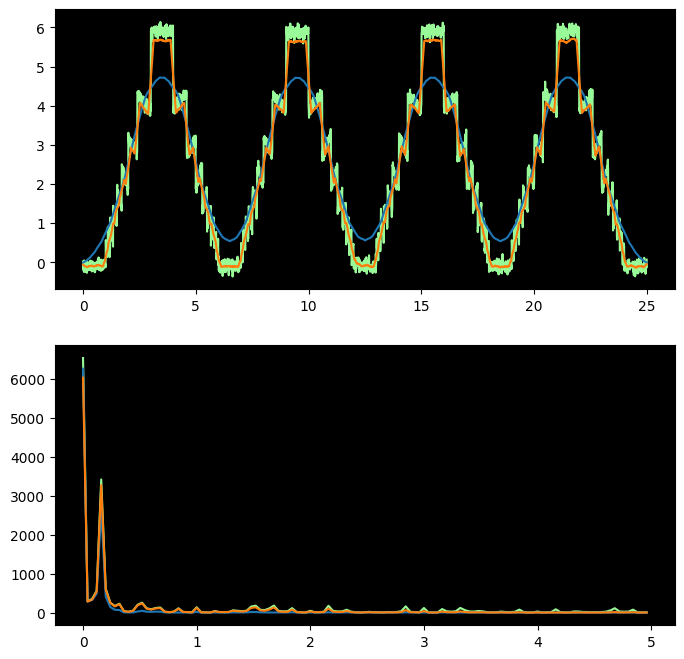

In [64]:
values_avg_mean1 = [avg_by_mean(values_noisy, t_idx, 12) for t_idx in range(len(values_noisy))]
values_avg_mean2 = [avg_by_mean(values_noisy, t_idx, 120) for t_idx in range(len(values_noisy))]

values_avg_mean1_fft = np.fft.fft(values_avg_mean1)
values_avg_mean2_fft = np.fft.fft(values_avg_mean2)


plt.subplot(2, 1, 1)
plt.plot(time, values_noisy, color='palegreen')
plt.plot(time, values_avg_mean2)
plt.plot(time, values_avg_mean1)

plt.subplot(2, 1, 2)
plt.plot(freq[0:len(freq)//20], np.abs(values_fft)[0:len(freq)//20], color='palegreen')
plt.plot(freq[0:len(freq)//20], np.abs(values_avg_mean2_fft)[0:len(freq)//20])
plt.plot(freq[0:len(freq)//20], np.abs(values_avg_mean1_fft)[0:len(freq)//20])

plt.show()

**(2)** Реализовать усреднение зашумленного сигнала по Гауссу, вывести спектр до и после. Сравнить с результатом усреднения по среднему значению, объяснить результаты.

In [65]:
def avg_by_gauss(values, t_idx, k):
    def gauss(h, p, w):
        s = w * (2 * np.pi - 1) / (4 * np.pi)
        g = np.exp(-5 * ((h - p) / s)**2)
        return g

    window_start = max(0, t_idx-k)
    window_end = min(len(values), t_idx+k)

    x_values = values[window_start:window_end]
    g_values = [gauss(t, t_idx, 2*k) for t in range(window_start, window_end)]
    g_values = g_values / np.sum(g_values)

    return np.sum(np.multiply(x_values, g_values))

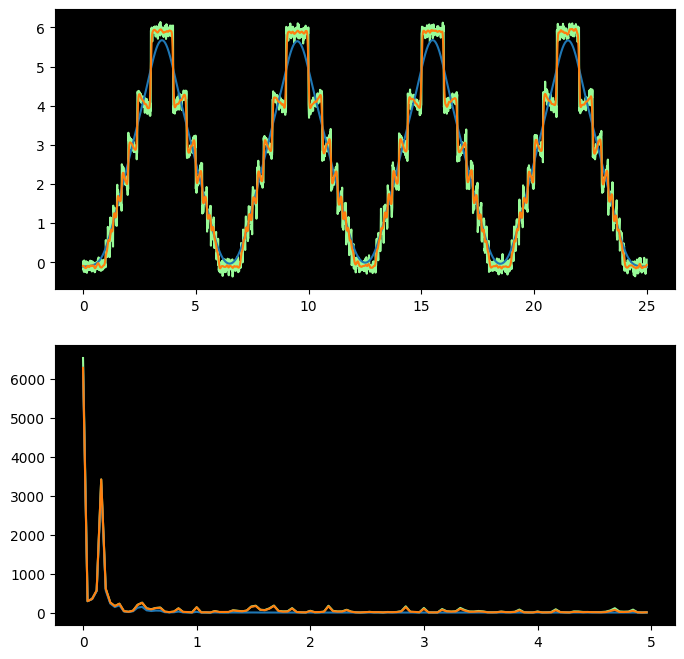

In [66]:
values_avg_gauss1 = [avg_by_gauss(values_noisy, t_idx, 12) for t_idx in range(len(values_noisy))]
values_avg_gauss2 = [avg_by_gauss(values_noisy, t_idx, 120) for t_idx in range(len(values_noisy))]

values_avg_gauss1_fft = np.fft.fft(values_avg_gauss1)
values_avg_gauss2_fft = np.fft.fft(values_avg_gauss2)


plt.subplot(2, 1, 1)
plt.plot(time, values_noisy, color='palegreen')
plt.plot(time, values_avg_gauss2)
plt.plot(time, values_avg_gauss1)

plt.subplot(2, 1, 2)
plt.plot(freq[0:len(freq)//20], np.abs(values_fft)[0:len(freq)//20], color='palegreen')
plt.plot(freq[0:len(freq)//20], np.abs(values_avg_gauss2_fft)[0:len(freq)//20])
plt.plot(freq[0:len(freq)//20], np.abs(values_avg_gauss1_fft)[0:len(freq)//20])

plt.show()

**(3)** Воспользоваться усреднением по Гауссу для обработки сигнала, состоящего из всплесков пиков. Всплеск каждого пика является случайно величиной. Амплитуда каждого пика $A=1 \ V$ <!-- *(что ещё за $V$, вольт что ли?…)* -->

In [67]:
def spiky(A, prob):
    if A < 0:
        # Режим случайной амплитуды
        A = np.random.rand() * (-A)

    return np.random.choice([1, 0], p=[prob, 1-prob]) * A

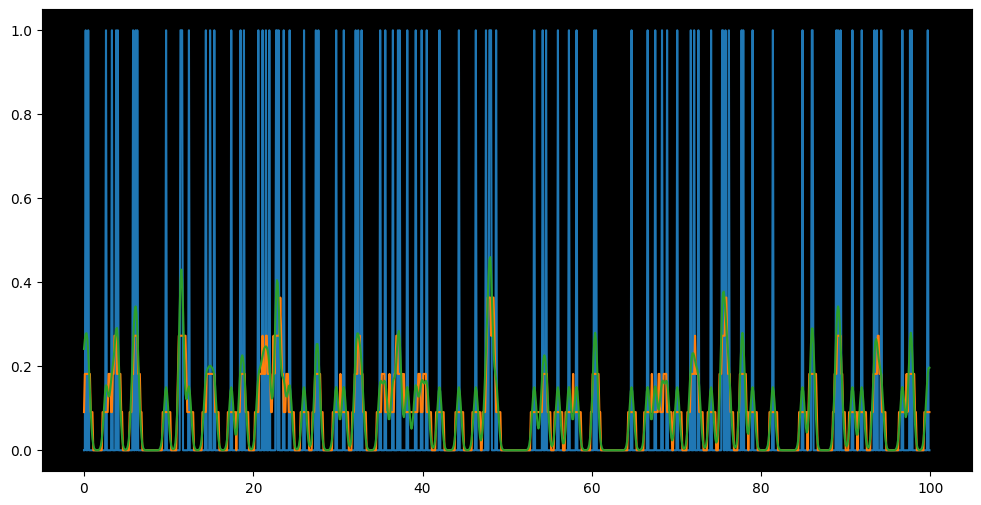

In [68]:
time_spiky = np.arange(0, 100, 0.1)
values_spiky = [spiky(1, 0.10) for t in time_spiky]

values_spiky_avg1 = [avg_by_gauss(values_spiky, t_idx, 10) for t_idx in range(len(values_spiky))]
values_spiky_avg2 = [avg_by_mean(values_spiky, t_idx, 5) for t_idx in range(len(values_spiky))]


plt.figure(figsize=(12, 6))

plt.plot(time_spiky, values_spiky)
plt.plot(time_spiky, values_spiky_avg2)
plt.plot(time_spiky, values_spiky_avg1)

plt.show()

**(4)** Реализовать медианный фильтр для очистки сигнала от случайных всплесков в сигнала. В этом
случае амплитуда всплеска сигнала уже не является постоянной и является случайной величиной.

In [69]:
def avg_by_median(values, t_idx, k):
    # Сортировать значения не нужно, NumPy делает это сам,
    # поэтому и передаём несортированные значения.
    window_start = max(0, t_idx-k)
    window_end = min(len(values), t_idx+k)    
    return np.median(sorted(values[window_start:window_end]))

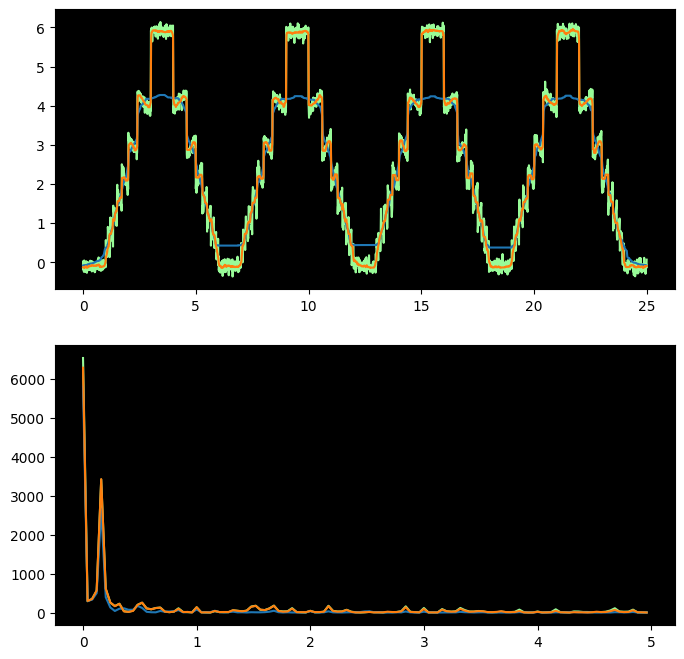

In [70]:
values_avg_median1 = [avg_by_median(values_noisy, t_idx, 12) for t_idx in range(len(values_noisy))]
values_avg_median2 = [avg_by_median(values_noisy, t_idx, 120) for t_idx in range(len(values_noisy))]

values_avg_median1_fft = np.fft.fft(values_avg_median1)
values_avg_median2_fft = np.fft.fft(values_avg_median2)


plt.subplot(2, 1, 1)
plt.plot(time, values_noisy, color='palegreen')
plt.plot(time, values_avg_median2)
plt.plot(time, values_avg_median1)

plt.subplot(2, 1, 2)
plt.plot(freq[0:len(freq)//20], np.abs(values_fft)[0:len(freq)//20], color='palegreen')
plt.plot(freq[0:len(freq)//20], np.abs(values_avg_median2_fft)[0:len(freq)//20])
plt.plot(freq[0:len(freq)//20], np.abs(values_avg_median1_fft)[0:len(freq)//20])

plt.show()

~~**Замечание:** Реализовать фильтрацию лучше в два этапа. Вначале ввести порог, выше которого пик будет
удаляться, затем применить медианный фильтр.~~

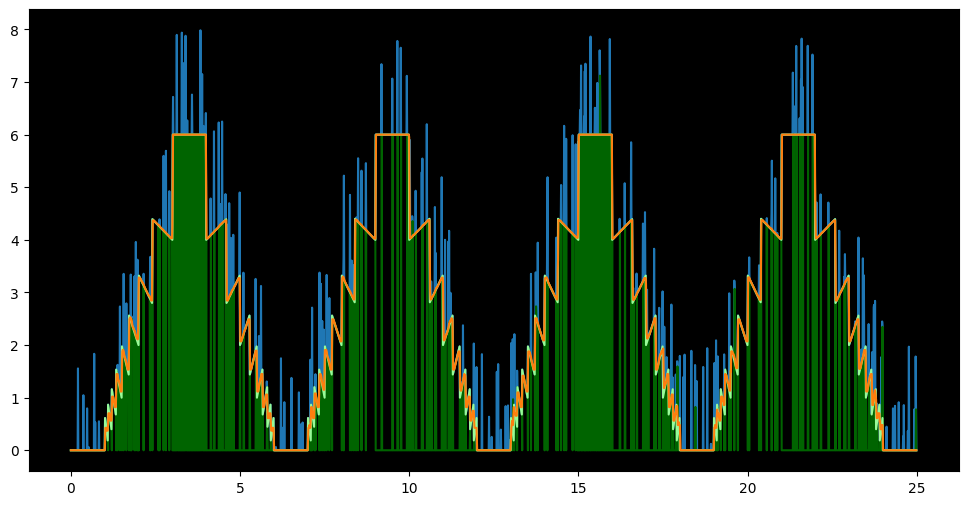

In [71]:
values_spikified = [v + spiky(-2, 0.10) for v in values]

values_despikified = values_spikified # Чтобы jupyter не ругался
values_despikified = list(map(lambda a: 0 if (values_despikified[a[0]-1] - a[1] <= 0) else a[1], enumerate(values_spikified)))

values_median = [avg_by_median(values_spikified, t_idx, 4) for t_idx in range(len(values_spikified))]


plt.figure(figsize=(12, 6))

plt.plot(time, values_spikified)
plt.plot(time, values_despikified, color='darkgreen')
plt.plot(time, values, color='palegreen')
plt.plot(time, values_median)

plt.show()

**(5)** Реализовать метод исключения линейного тренда из сигнала с использованием **критерия
Байесовской информации (BIC)**, вывести спектр сигнала до и после иключения тренда:

- `n` — количество наблюдений в данных $n$
- `disp` — оценка дисперии ошибок модели $\delta$
- `K` — количество параметров в модели $K$

Количеством параметров модели будет
являться массив выбранных степеней
полиномов.

In [5]:
def trendy_signal(t, q):
    return np.abs(
        (
            np.sin(2 * np.pi * t * np.pi) +
            np.cos(2 * np.pi * t * np.e)
        ) * (
            np.sin(2 * np.pi * t * np.pi - np.e) +
            np.sin(2 * np.pi * t * np.e - np.pi)
        )**2
    ) + (t / q) * np.cos(t)

In [6]:
def calculate_BIC(n, y_trues, y_preds, K):
    y_diffs = y_preds - y_trues
    disp = np.sum(y_diffs**2)
    epsilon = n**(-1) * disp
    return (n * np.log(epsilon) + K * np.log(n))

Степень с наименьшим BIC ([1054.7890485645487, 1055.4980562481264, 1056.207063931704, 1056.9160716152817, 1057.6250792988592, 1058.3340869824367, 1059.0430946660144, 1059.752102349592, 1060.4611100331697, 1061.1701177167472, 1057.150413632549, 1057.8594213161266, 1058.5684289997043, 1059.2774366832818, 1059.9864443668594, 1060.695452050437, 1061.4044597340146, 1062.1134674175923, 1062.8224751011699, 1063.5314827847476, 1063.005862491736, 1063.7148701753135, 1064.4238778588913, 1065.1328855424688, 1065.8418932260465, 1066.550900909624, 1067.2599085932018, 1067.9689162767793, 1068.6779239603568, 1069.3869316439345, 1040.3902377313666, 1041.099245414944, 1041.8082530985218, 1042.5172607820994, 1043.226268465677, 1043.9352761492546, 1044.6442838328321, 1045.3532915164099, 1046.0622991999874, 1046.771306883565, 580.4161785621765, 581.1251862457541, 581.8341939293317, 582.5432016129093, 583.252209296487, 583.9612169800646, 584.6702246636421, 585.3792323472197, 586.0882400307974, 586.79724771

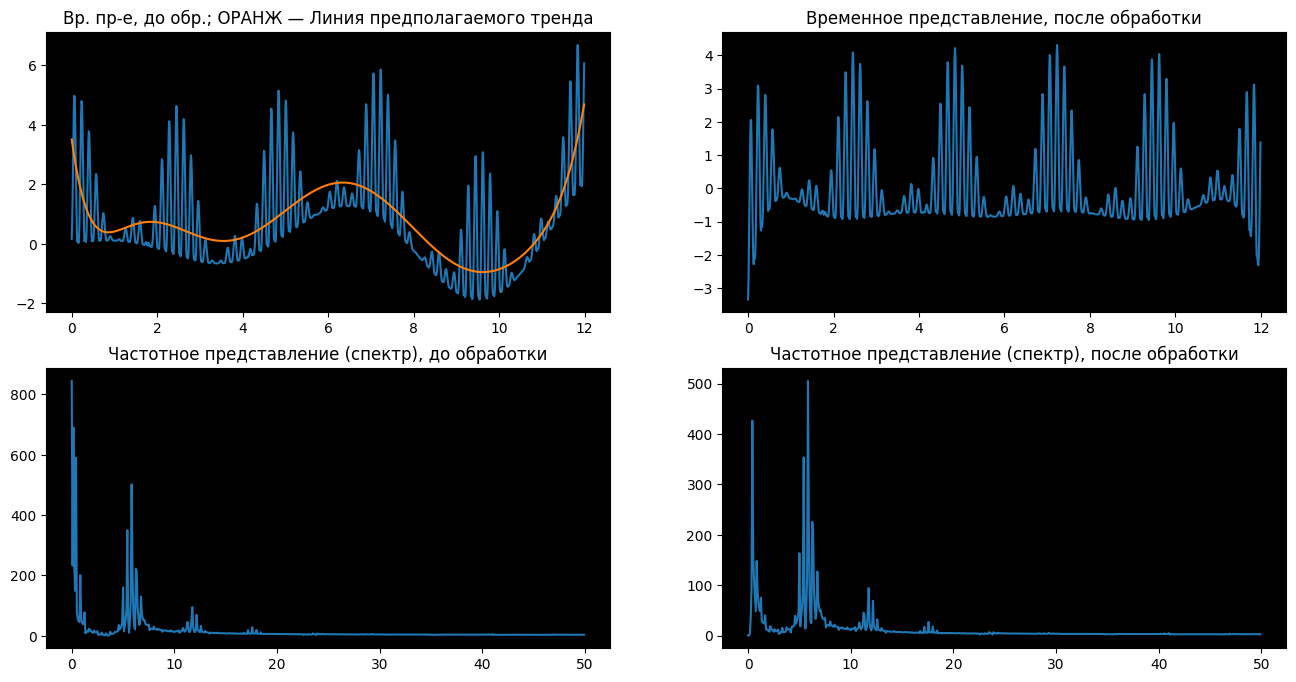

In [11]:
trendy_time = np.arange(0, 12, 0.01)
trendy_values = [trendy_signal(t, 5) for t in trendy_time]


degrees = np.arange(0, 10, 0.1) # Перебираем полиномы различных тепеней
BIC_values = []
models = []

for degree in degrees:
    coeffs = np.polyfit(trendy_time, trendy_values, degree)
    model = np.poly1d(coeffs)
    models.append(model)
    
    predicted_trend = model(trendy_time)
    
    BIC = calculate_BIC(len(trendy_values), trendy_values, predicted_trend, degree+1)  # Делаем +1 из-за свободного члена
    BIC_values.append(BIC)


best_degree = degrees[np.argmin(BIC_values)]

best_model = models[np.argmin(BIC_values)]
print(f'Степень с наименьшим BIC ({BIC_values}): {best_degree} ({BIC_values[int(best_degree*10) -1]}).')

best_trend = best_model(trendy_time)

residual_values = trendy_values - best_trend


trendy_values_fft = np.fft.fft(trendy_values)
residual_values_fft = np.fft.fft(residual_values)
frequencies = np.fft.fftfreq(len(trendy_values), 0.01)


plt.figure(figsize=(16, 8))

plt.subplot(2, 2, 1)
plt.title("Вр. пр-е, до обр.; ОРАНЖ — Линия предполагаемого тренда")
plt.plot(trendy_time, trendy_values)
plt.plot(trendy_time, best_trend)

plt.subplot(2, 2, 2)
plt.title("Временное представление, после обработки")
plt.plot(trendy_time, residual_values)

plt.subplot(2, 2, 3)
plt.title("Частотное представление (спектр), до обработки")
plt.plot(frequencies[:len(trendy_values)//2], np.abs(trendy_values_fft)[:len(trendy_values)//2])

plt.subplot(2, 2, 4)
plt.title("Частотное представление (спектр), после обработки")
plt.plot(frequencies[:len(trendy_values)//2], np.abs(residual_values_fft)[:len(residual_values)//2])

plt.show()

$\large{\large{H}}$

*(stands for "$не \ успел \ сдать \ опять, да \ блина$")…* ~~*-ладно, завтра сдам :(-*~~ Дело сделано!